# Part 3

## 1.

In [118]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from   mpl_toolkits.mplot3d import Axes3D
from   scipy.stats import multivariate_normal
from sklearn import metrics 

<IPython.core.display.Javascript object>


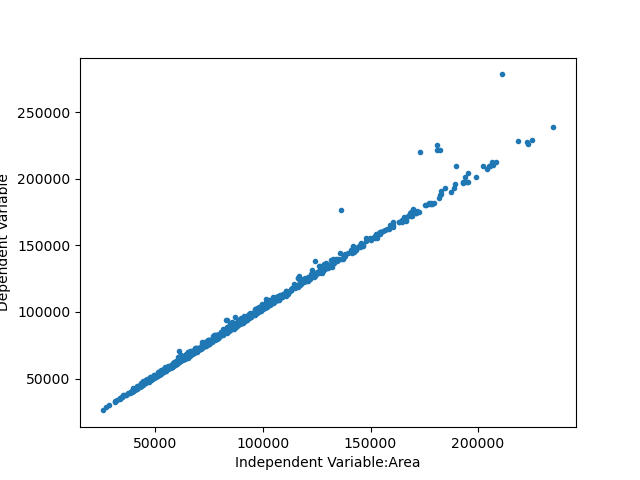

<IPython.core.display.Javascript object>


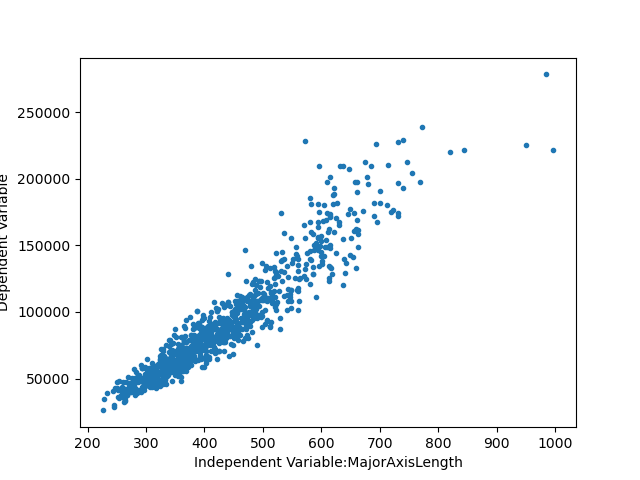

<IPython.core.display.Javascript object>


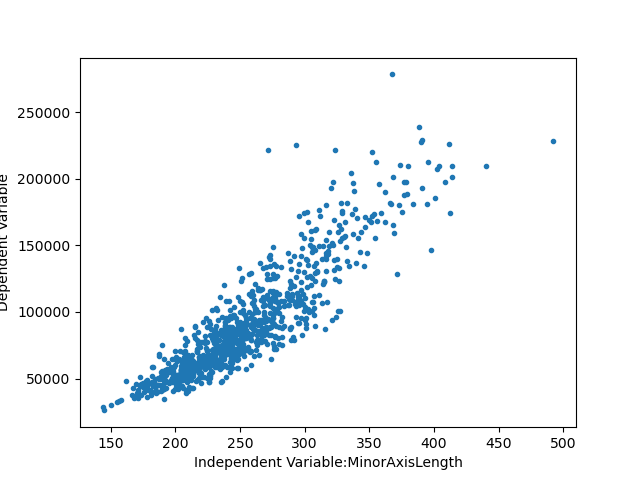

<IPython.core.display.Javascript object>


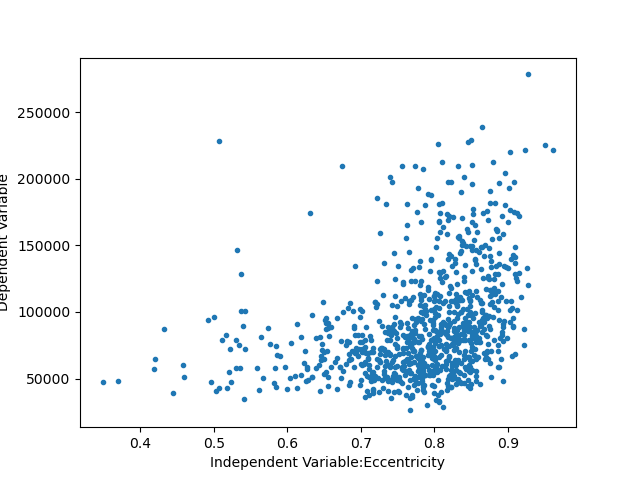

<IPython.core.display.Javascript object>


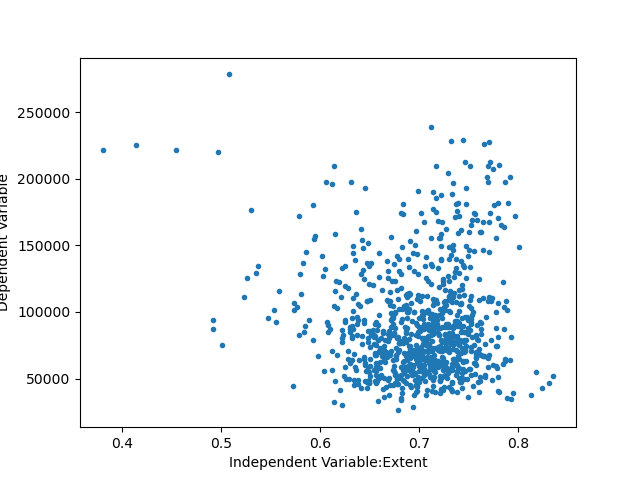

<IPython.core.display.Javascript object>


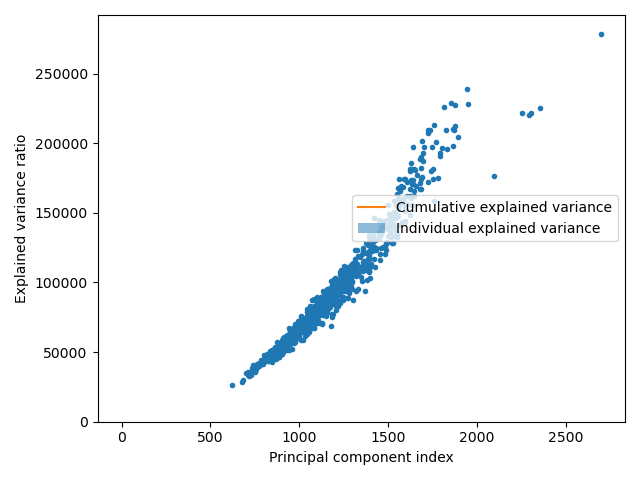

In [119]:

data=pd.read_csv(r"C:\Users\nick8\Downloads\Raisin_Dataset.csv")
IndVar=pd.DataFrame(data,columns=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Perimeter'])
DepVar=pd.DataFrame(data,columns=['ConvexArea'])

DV=DepVar.to_numpy()
IV=IndVar.to_numpy()
#rint(DepVar[0])
#rint(IndVar)
y=DV
xlabel=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Perimeter']
for i in range(6):
    x=IV[:,i]
    fig, ax = plt.subplots()
    ax.plot(x, y,'.')
    plt.xlabel("Independent Variable:"+str(xlabel[i]))
    plt.ylabel("Dependent Variable")


As a result of these six plots, the Convex Area vs. Area or Perimeter or Major Axis Length or Minor Axis Length plot clearly illustrates the phenomenon that, as one variable increases, the other tends to increase as well. The data has been increasing over time, in other words. The Convex Area vs. Area plot, in particular, suggests that the data is both increasing and relatively stable over time. It appears like a straight line showing the most obvious trend. As for plots like Convex Area vs. Eccentricity one or Convex Area vs. Extent one, each rather clearly shows random scatter and has lots of dispersion. 

## 2.

In [120]:
x_Train=IV[0:600,0:6]
y_Train=DV[0:600,0]

for i in range(6):
    x=x_Train[:,i]
    matrix = np.corrcoef(x, y_Train)
    print("Correlation Matrix for independent variable and dependent variable: ",xlabel[i])
    print(matrix)

Correlation Matrix for independent variable and dependent variable:  Area
[[1.         0.99506481]
 [0.99506481 1.        ]]
Correlation Matrix for independent variable and dependent variable:  MajorAxisLength
[[1.         0.94691044]
 [0.94691044 1.        ]]
Correlation Matrix for independent variable and dependent variable:  MinorAxisLength
[[1.         0.87337268]
 [0.87337268 1.        ]]
Correlation Matrix for independent variable and dependent variable:  Eccentricity
[[1.         0.31359612]
 [0.31359612 1.        ]]
Correlation Matrix for independent variable and dependent variable:  Extent
[[ 1.         -0.16052446]
 [-0.16052446  1.        ]]
Correlation Matrix for independent variable and dependent variable:  Perimeter
[[1.         0.97963149]
 [0.97963149 1.        ]]


Among these conclusions, the independent variable, area has the biggest major impact on the dependent variable, convex area. In addition, the perimeter, major axis length, and minor axis length also have quite a major impact on the convex area. They all have positive relationships, and the strongest one is between the area and the convex area. As for eccentricity and extent, their impacts are much lower than the others. However, correlation alone does not necessarily imply causation. A high correlation between an independent variable and the dependent variable does not prove that one causes the other. Correlation only indicates a statistical association or relationship. Additionally, correlation does not indicate the direction of causation. There is a possibility that the dependent variable causes changes in the independent variable, or that a third variable contributes to both. Thus, it may be necessary to look beyond correlation and consider additional evidence and causal inference methods in order to make causal scenarios. 

## 3. 

In [121]:
from sklearn import datasets, linear_model, metrics
   
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(x_Train, y_Train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [ 9.28008305e-01 -8.92658042e+01 -1.25009455e+02 -1.44832254e+04
  1.01963204e+03  7.63406072e+01]


**Area** has the most impact to the dependant variable. 

## 4.

In [122]:
#Testing data

x_Test=IV[600:900,0:6]
y_Test=DV[600:900,0]

y_pre=reg.predict(x_Test)

from sklearn.metrics import mean_squared_log_error
print("The Mean Square Error is: " , mean_squared_log_error(y_pre,y_Test))

The Mean Square Error is:  0.0003534607331688197


The model has a good prediction performance.

## 5. 

Based on the results, the independent variables seem to be not mutually linearly independent since there is an influence when linear dependence appeared among independent variables. In particular, it can make it difficult to interpret coefficients, lead to unstable results, and make it difficult to identify variables that are significant. The interrelationship between these variables makes it difficult to interpret their individual contributions. For a linear regression model to be reliable and interpretable, it is vital to detect and address linear dependence among the independent variables. 

## 6.

In [123]:
import sklearn
from sklearn.decomposition import PCA

X = df[['Area','MajorAxisLength',"MinorAxisLength","Eccentricity","Extent","Perimeter"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(600, 6) (300, 6) (600, 1) (300, 1)


In [124]:
sklearn_pca = sklearn.decomposition.PCA()

sklearn_pca.fit(X_train)  # Perform PCA on the training data matrix of independent variables

# Print the variance explained
print('Variance percent explained:\n', sklearn_pca.explained_variance_ratio_)

Variance percent explained:
 [9.99994412e-01 5.10449112e-06 4.48162868e-07 3.55235936e-08
 1.22894344e-12 9.89215251e-13]


## 7.

0    9.999944e-01
1    5.104491e-06
2    4.481629e-07
3    3.552359e-08
4    1.228943e-12
5    9.892153e-13
dtype: float64


<IPython.core.display.Javascript object>


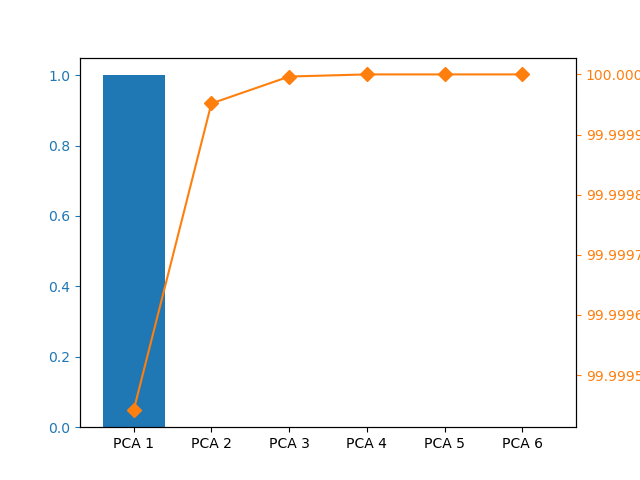

In [128]:
# Pareto chart

series = pd.Series(sklearn_pca.explained_variance_ratio_) 
print(series)
from matplotlib.ticker import PercentFormatter
df = pd.DataFrame({'Pareto': series})
df.index = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6']
df = df.sort_values(by='Pareto',ascending=False)
df["cumpercentage"] = df["Pareto"].cumsum()/df["Pareto"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["Pareto"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

## 8.

In [130]:
pca_x = PCA(n_components=3)

X_Train = pca_x.fit_transform(x_Train)
X_Test = pca_x.transform(x_Test)

reg = linear_model.LinearRegression()
  
# train the model using the training sets

pcr = reg.fit(X_Train, y_Train)
y_pred = pcr.predict(X_Test)

#print(y_pred)
from sklearn.metrics import mean_squared_log_error
print("The Mean Square Error is: " , mean_squared_log_error(y_pred,y_Test))

The Mean Square Error is:  0.0003795817771067622


## 9. 

_A practical scenario when you will use PCA to reduce to data dimensionality before fitting a regression model:_

Example: __Methods for churn prediction in the pre-paid mobile telecommunications industry__

**A practical scenario:**

Assume that you are interested in predicting churn (i.e., the frequency at which customers switch to competitors) in the pre-paid mobile telecommunications industry based on customer characteristics and usage patterns. You have collected a wide range of data about your customers, including demographics, call and data usage, customer service interactions, and billing details.

First, the principal component analysis (PCA) algorithm can be applied to reduce the dimensionality of the problem of multicollinearity and improve the predictive power of the models. To fit a regression model to the reduced-dimension dataset, transform the data by selecting the number of principal components. Finally, the robustness of the model to correlated features can be enhanced. 

_A practical scenario when you will NOT use PCA to reduce to data dimensionality before fitting a regression model:_

Example: **Analyzing Medical Data for Disease Prediction**        

**A practical scenario:**

Imagine you are working on a healthcare project aimed at predicting the likelihood of a specific medical condition (e.g., diabetes) based on a comprehensive dataset of patient health records. A mix of demographic data, medical history, laboratory test results, and other relevant information is included in the dataset.

In this situation, PCA is not recommended. Interpretability is an important consideration in the healthcare industry. For medical professionals to make informed decisions, they must understand why predictions are made. There may be a lack of a clear, interpretable relationship between the main components generated by PCA and the original features, making it difficult for medical professionals to communicate the results of the model.